In [1]:
from scipy import signal
from math import pi
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

**Question 1**


In [2]:
#Parameters
f1 = 900
b1 = 200
fs = 16000
ts = 1/fs
ts

6.25e-05

In [3]:
r = np.exp(-pi*b1*ts)
theta = 2*pi*f1*ts

In [4]:
#getting transfer function coefficients from zeroes and poles
num, den = signal.zpk2tf([0,0], [r*np.exp(1j*theta) , r*np.exp(-1j*theta)], 1)

Text(0.5, 0, 'Frequency in Hz')

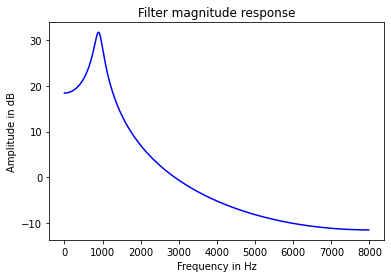

In [5]:
#Plotting frequency response - Magnitude
omega, freq_resp = signal.freqz(num, den)
plt.figure()
plt.title('Filter magnitude response')
f_hz = fs * omega/(2*pi)
mag = 20*np.log10(abs(freq_resp))
plt.plot(f_hz,mag,'b')
plt.ylabel('Amplitude in dB')
plt.xlabel('Frequency in Hz')

Text(0.5, 0, 'Frequency in Hz')

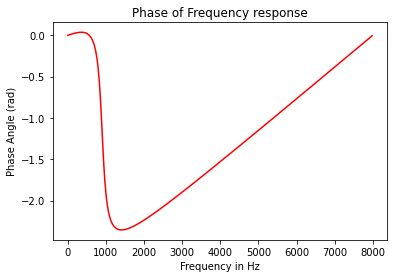

In [6]:
#Plotting Frequency response - Phase
angle = np.angle(freq_resp)
plt.plot(f_hz,angle,'r')
plt.title("Phase of Frequency response")
plt.ylabel("Phase Angle (rad)")
plt.xlabel('Frequency in Hz')

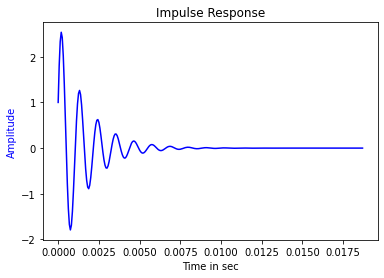

In [7]:
#Calculating Impulse Response, for 300 time steps
x = np.zeros(300)	#initialise input
x[0] = 1	#Delta function input

y = np.zeros(300) # initialise impulse response

time = np.linspace(0, 300/fs , 300, endpoint=False) #time steps in seconds

#using difference equations (.real is used as coefficients may be complex)
y[0] = x[0]
y[1] = x[1] - den[1].real*y[0]		
for i in range(2, 300):
	y[i] = x[i] - den[1].real*y[i-1] - den[2].real*y[i-2]
plt.title('Impulse Response')
plt.plot(time, y, 'b')
plt.ylabel('Amplitude', color='b')
plt.xlabel('Time in sec')
plt.show()

**Question 2**

In [8]:
#Parameters
f0 = 140
T = 0.5
num_samples = int(fs*T)
num_samples

8000

In [9]:
# Excitation signal formation
time = np.linspace(0, T, num_samples)
x = np.zeros(num_samples)
y = np.zeros(num_samples)

# sawtooth approximation using square
# sawtooth = signal.square(2*np.pi*fs*time, duty=0.01)+1
# square = signal.square(2 * np.pi * fs* time, duty=0.01)

#initialising input as impulse train
for i in range(0, int(T*f0)):
    x[i*int(np.floor(fs/f0))]=1

Text(0, 0.5, 'Amplitude')

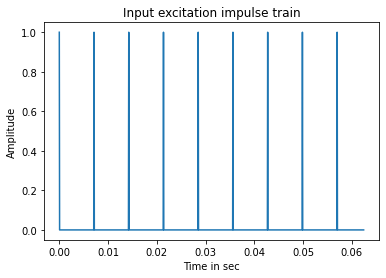

In [10]:
#excitation signal plot
plt.plot(time[:1000],x[:1000])
plt.title('Input excitation impulse train')
plt.xlabel("Time in sec")
plt.ylabel("Amplitude")


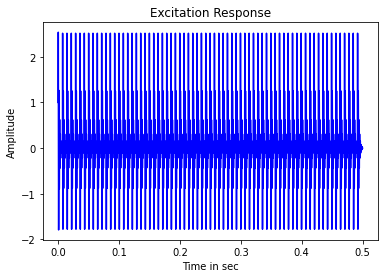

In [11]:
#using difference equations
y[0] = x[0]
y[1] = x[1] - den[1].real*y[0]		
for i in range(2, int(T*fs)):
	y[i] = x[i] - den[1].real*y[i-1] - den[2].real*y[i-2]

plt.title('Excitation Response')
plt.plot(time, y, 'b')
plt.ylabel('Amplitude')
plt.xlabel('Time in sec')
plt.show()

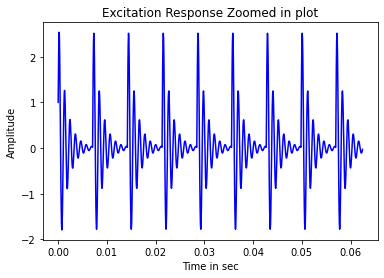

In [12]:
plt.title('Excitation Response Zoomed in plot')
plt.plot(time[0:1000], y[0:1000], 'b')
plt.ylabel('Amplitude')
plt.xlabel('Time in sec')
plt.show()

In [13]:
#output audio file
y = np.int16(y/np.max(np.abs(y))*32767)
write("audio_q2.wav",16000,y)

**Question 3**

In [14]:
def q2(f0,f1,b1):
  #Parameters
  fs = 16000
  ts = 1/fs
  T = 0.5 # duration
  num_samples = int(fs*T)

  #getting transfer function 
  r = np.exp(-pi*b1*ts)
  theta = 2*pi*f1*ts
  num, den = signal.zpk2tf([0,0], [r*np.exp(1j*theta) , r*np.exp(-1j*theta)], 1)

  #Plotting Freq resp
  omega, freq_resp = signal.freqz(num, den)
  plt.figure()
  plt.title("Filter magnitude response_"+"_".join([str(f0),str(f1),str(b1)]))
  f_hz = fs * omega/(2*pi)
  mag = 20*np.log10(abs(freq_resp))
  plt.plot(f_hz,mag,'b')
  plt.ylabel('Amplitude in dB')
  plt.xlabel('Frequency in Hz')
  plt.show()

  #Impulse Response, 300 time steps
  x = np.zeros(300)	
  x[0] = 1	#Delta function input
  y = np.zeros(300) # initialise impulse response
  time = np.linspace(0,300/fs , 300, endpoint=False)
  #using difference equations
  y[0] = x[0]
  y[1] = x[1] - den[1].real*y[0]		
  for i in range(2, 300):
    y[i] = x[i] - den[1].real*y[i-1] - den[2].real*y[i-2]
  plt.figure()
  plt.title("Impulse Response_"+"_".join([str(f0),str(f1),str(b1)]))
  plt.plot(time, y, 'b')
  plt.ylabel('Amplitude', color='b')
  plt.xlabel('Time in sec')
  plt.show()

  # Excitation signal formation
  time = np.linspace(0, T, num_samples)
  x = np.zeros(num_samples)
  y = np.zeros(num_samples)

  # impulse train
  for i in range(0, int(T*f0)):
      x[i*int(np.floor(fs/f0))]=1

  y[0] = x[0]
  y[1] = x[1] - den[1].real*y[0]		
  for i in range(2, int(T*fs)):
    y[i] = x[i] - den[1].real*y[i-1] - den[2].real*y[i-2]

  plt.title("Excitation Response_"+"_".join([str(f0),str(f1),str(b1)]))
  plt.plot(time, y, 'b')
  plt.ylabel('Amplitude')
  plt.xlabel('Time in sec')
  plt.show()

  plt.figure()
  plt.title("Excitation Response Zoomed_"+"_".join([str(f0),str(f1),str(b1)]))
  plt.plot(time[:1000], y[:1000], 'b')
  plt.ylabel('Amplitude')
  plt.xlabel('Time in sec')
  plt.show()
  y = np.int16(y/np.max(np.abs(y))*32767)
  write("audio_q3_"+"_".join([str(f0),str(f1),str(b1)])+".wav",16000,y)
  return

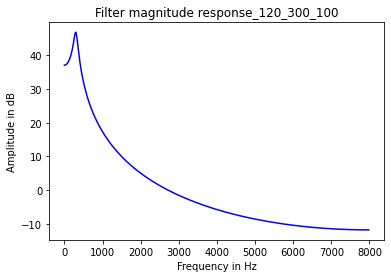

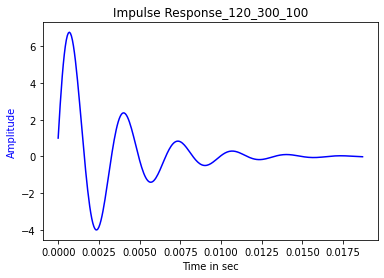

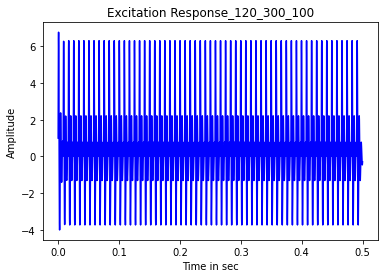

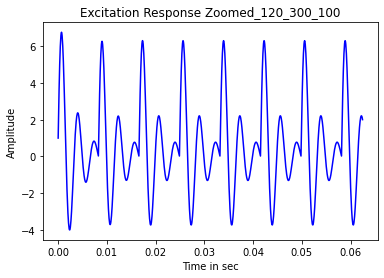

In [15]:
q2(120,300,100)

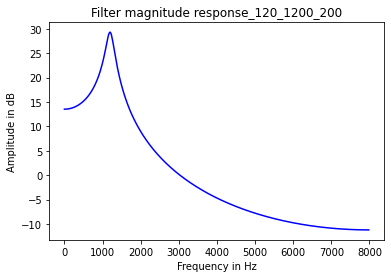

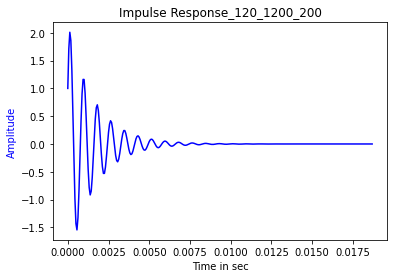

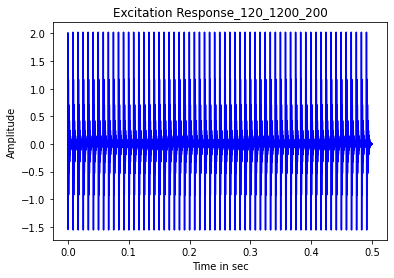

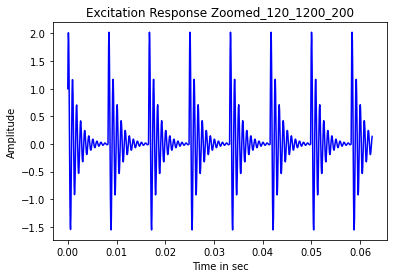

In [16]:
q2(120,1200,200)

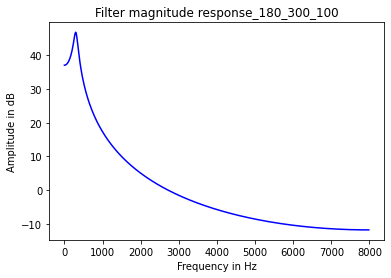

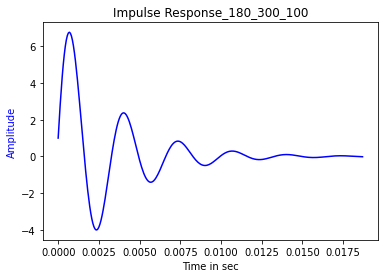

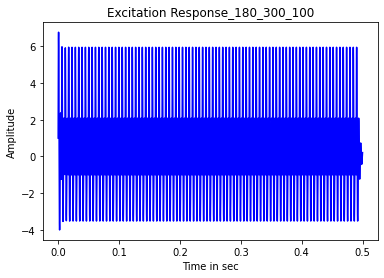

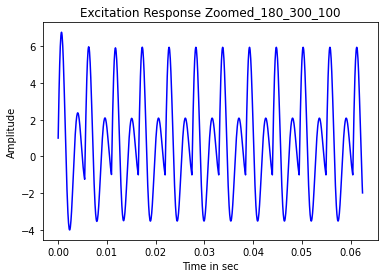

In [17]:
q2(180,300,100)

**Question 4**

In [18]:
def get_audio_waveform(f0, f1, f2, f3, phone):
  #other parameters
  b1 = 100
  fs = 16000
  ts = 1/fs
  T = 0.5
  num_samples = int(fs*T)

  #getting transfer function for each frequency as a single formant resonator
  r = np.exp(-pi*b1*ts)
  theta = [2*pi*f1*ts, 2*pi*f2*ts, 2*pi*f3*ts]
  num1, den1 = signal.zpk2tf([0,0], [r*np.exp(1j*theta[0]) , r*np.exp(-1j*theta[0])], 1)
  num2, den2 = signal.zpk2tf([0,0], [r*np.exp(1j*theta[1]) , r*np.exp(-1j*theta[1])], 1)
  num3, den3 = signal.zpk2tf([0,0], [r*np.exp(1j*theta[2]) , r*np.exp(-1j*theta[2])], 1)

  #for plotting magnitude response combine all poles and zeroes to get single transfer function of the cascade
  poles = [r*np.exp(1j*theta[0]) , r*np.exp(-1j*theta[0]), r*np.exp(1j*theta[1]) , r*np.exp(-1j*theta[1]), r*np.exp(1j*theta[2]) , r*np.exp(-1j*theta[2])]
  zeros = [0,0,0,0,0,0]
  num, den = signal.zpk2tf(zeros, poles, 1)
  
  #Plotting magnitude response
  omega, freq_resp = signal.freqz(num, den)
  plt.figure()
  plt.title('Filter magnitude response for '+phone+' at f0 = '+str(f0)+' Hz')
  f_hz = fs * omega/(2*pi)
  mag = 20*np.log10(abs(freq_resp))
  plt.plot(f_hz,mag,'b')
  plt.ylabel('Amplitude in dB')
  plt.xlabel('Frequency in Hz')
  plt.show()


  time = np.linspace(0, T, num_samples)
  x = np.zeros(num_samples)
  y = np.zeros(num_samples)
  state1 = np.zeros(num_samples)
  state2 = np.zeros(num_samples)

  #Impulse train
  for i in range(0, int(T*f0)):
    x[i*int(np.floor(fs/f0))] = 1

  #using differnce equations - since there are three cascade systems for three different formant freq, have to do three times
  #first system
  state1[0] = x[0]
  state1[1] = x[1] - den1[1].real*state1[0]	
  for i in range(2, num_samples):
      state1[i] = x[i] - den1[1].real*state1[i-1] - den1[2].real*state1[i-2]

  #second system
  state2[0] = state1[0]
  state2[1] = state1[1] - den2[1].real*state2[0]	
  for i in range(2, num_samples):
      state2[i] = state1[i] - den2[1].real*state2[i-1] - den2[2].real*state2[i-2]
  
  #Last third system
  y[0] = state2[0]
  y[1] = state2[1] - den3[1].real*y[0]	
  for i in range(2, num_samples):
      y[i] = state2[i] - den3[1].real*y[i-1] - den3[2].real*y[i-2]

  #plotting outputs
  plt.figure()
  plt.title('Excitation Response for '+phone+' at f0 = '+str(f0)+' Hz')
  plt.plot(time, y, 'b')
  plt.ylabel('Amplitude')
  plt.xlabel('Time in sec')
  plt.show()

  plt.figure()
  plt.title('Excitation Response Zoomed in for '+phone+' at f0 = '+str(f0)+' Hz')
  plt.plot(time[0:1000], y[0:1000], 'b')
  plt.ylabel('Amplitude')
  plt.xlabel('Time in sec')
  plt.show()
  y = np.int16(y/np.max(np.abs(y))*32767)
  write("audio_'"+phone[1]+"'_"+str(f0)+"Hz.wav",16000,y)
	
  return


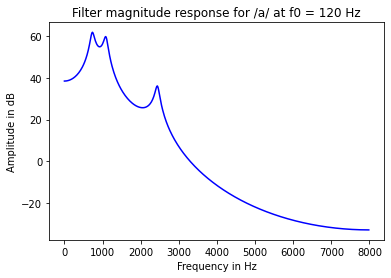

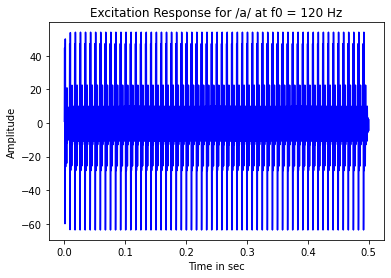

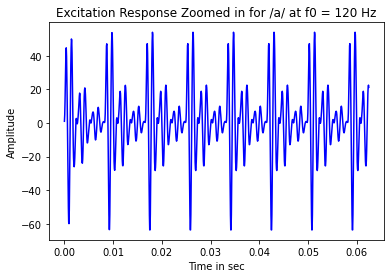

In [19]:
get_audio_waveform(120, 730, 1090, 2440, '/a/')

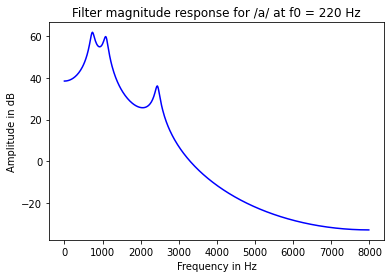

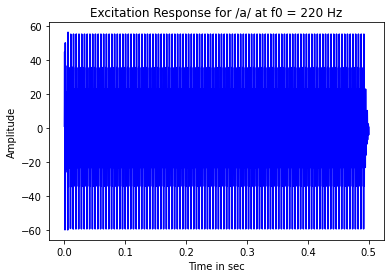

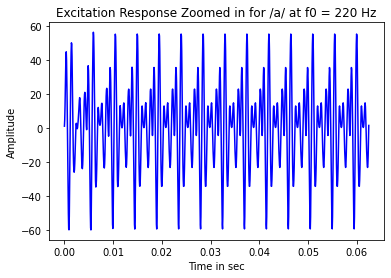

In [20]:
get_audio_waveform(220, 730, 1090, 2440, '/a/')

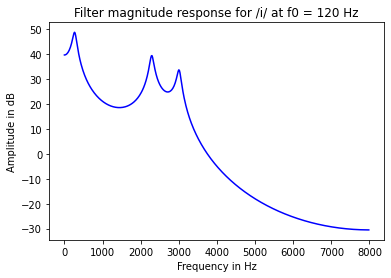

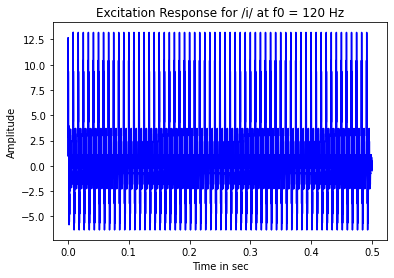

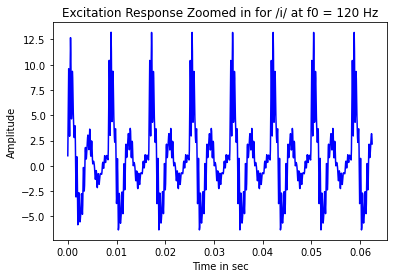

In [21]:
get_audio_waveform(120, 270, 2290, 3010, '/i/')

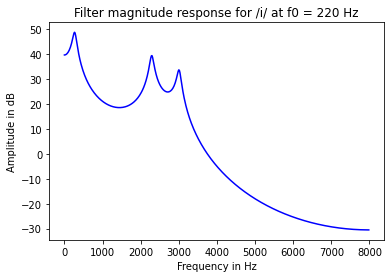

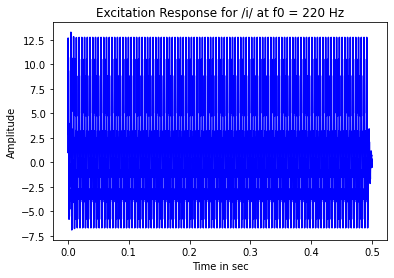

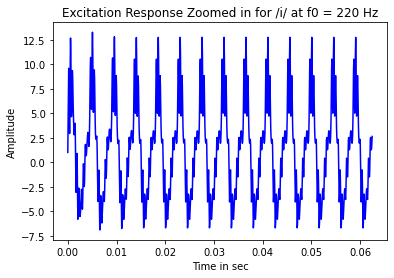

In [22]:
get_audio_waveform(220, 270, 2290, 3010, '/i/')

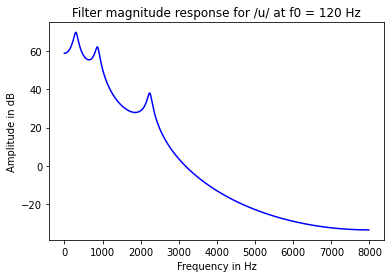

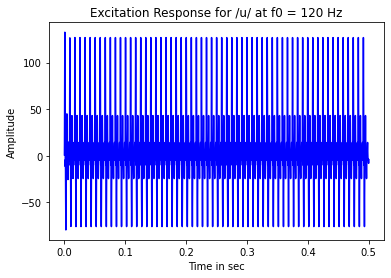

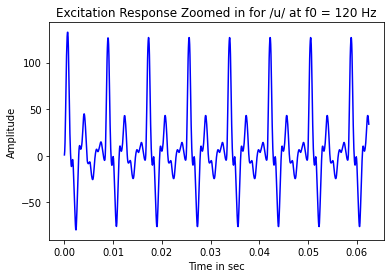

In [23]:
get_audio_waveform(120, 300, 870, 2240, '/u/')

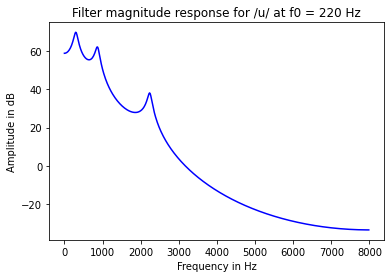

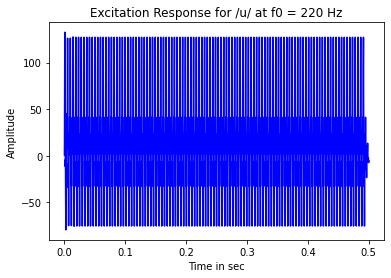

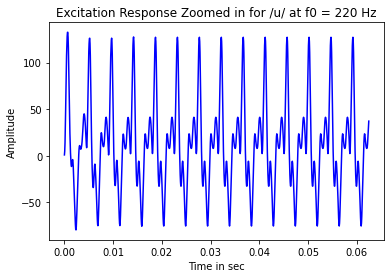

In [24]:
get_audio_waveform(220, 300, 870, 2240, '/u/')